# Linear Regression

### Importing libraries

In [292]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing dateset

In [293]:
train_set = pd.read_csv('A-train.csv')
test_set = pd.read_csv('A-test.csv')
cols = ['x1','x2','x3','x4','x5','x6','x7','x8','y']

In [294]:
train_set

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,26.52,89.93,-60.46,1137.04,-3.49,NaN,-5.88,-17.13,7.44
1,-68.18,-127.21,23.30,1471.49,16.95,2.30,-11.51,-7.70,7.31
2,-95.05,36.10,-75.27,1158.04,6.97,3.21,-5.86,8.65,-5.77
3,124.40,-8.19,NaN,5527.92,7.36,7.23,10.77,1.92,-0.42
4,-103.25,NaN,-2.89,4865.06,-5.21,-1.54,NaN,4.69,4.31
...,...,...,...,...,...,...,...,...,...
185,34.29,-38.65,-44.41,9775.28,-3.43,4.95,4.60,-11.73,11.78
186,1.62,145.02,53.26,4546.80,11.81,-4.31,4.86,-0.42,3.79
187,29.46,33.91,-20.96,6083819.57,5.10,2.93,1.23,3.23,-3.17
188,-64.93,25.39,-118.74,1746.40,226.26,-1.91,-16.11,-10.44,0.97


In [295]:
test_set

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,65.16,4.49,-105.75,600.25,-0.91,NaN,-1.36,-7.43,A_01
1,-24.74,-1.55,91.05,2401.98,-1.52,13.60,5.66,10.59,A_02
2,107.54,-28.69,-82.59,25789.15,5.29,-8.56,1.49,-4.73,A_03
3,12.02,32.32,NaN,2.76,1.20,-9.52,-4.20,7.48,A_04
4,45.08,96.62,51.85,1.28,3.58,0.52,-6.86,-0.78,A_05
5,-122.81,17.79,-182.85,2928.97,-1.21,-2.06,9.68,-8.59,A_06
6,77.61,-72.30,97.28,19173.94,-9.29,0.86,7.06,-8.06,A_07
7,-79.36,NaN,-220.91,NaN,7.24,6.19,NaN,9.71,A_08
8,NaN,188.39,-16.47,3976.56,NaN,-1.04,-23.44,NaN,A_09
9,-44.01,131.65,69.88,1778.31,-13.75,-14.75,-12.27,-0.83,A_10


### Data Processing

In [296]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      181 non-null    float64
 1   x2      180 non-null    float64
 2   x3      180 non-null    float64
 3   x4      181 non-null    float64
 4   x5      180 non-null    float64
 5   x6      180 non-null    float64
 6   x7      180 non-null    float64
 7   x8      181 non-null    float64
 8   y       188 non-null    float64
dtypes: float64(9)
memory usage: 13.5 KB


In [297]:
before_fill = train_set.describe()

#### Fill missing values

In [298]:
train_set = train_set.to_numpy()

In [299]:
train_set

array([[  26.52,   89.93,  -60.46, ...,   -5.88,  -17.13,    7.44],
       [ -68.18, -127.21,   23.3 , ...,  -11.51,   -7.7 ,    7.31],
       [ -95.05,   36.1 ,  -75.27, ...,   -5.86,    8.65,   -5.77],
       ...,
       [  29.46,   33.91,  -20.96, ...,    1.23,    3.23,   -3.17],
       [ -64.93,   25.39, -118.74, ...,  -16.11,  -10.44,    0.97],
       [-101.85,     nan,   -9.53, ...,  -20.61,   -1.31,    1.44]])

In [300]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(train_set[:, :])
train_set[: , :] = imputer.transform(train_set[:, :])

In [301]:
train_set = pd.DataFrame(train_set, columns=cols)

In [302]:
train_set

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,26.52,89.930000,-60.460000,1137.04,-3.49,1.386444,-5.880000,-17.13,7.44
1,-68.18,-127.210000,23.300000,1471.49,16.95,2.300000,-11.510000,-7.70,7.31
2,-95.05,36.100000,-75.270000,1158.04,6.97,3.210000,-5.860000,8.65,-5.77
3,124.40,-8.190000,2.463778,5527.92,7.36,7.230000,10.770000,1.92,-0.42
4,-103.25,6.777722,-2.890000,4865.06,-5.21,-1.540000,-0.243444,4.69,4.31
...,...,...,...,...,...,...,...,...,...
185,34.29,-38.650000,-44.410000,9775.28,-3.43,4.950000,4.600000,-11.73,11.78
186,1.62,145.020000,53.260000,4546.80,11.81,-4.310000,4.860000,-0.42,3.79
187,29.46,33.910000,-20.960000,6083819.57,5.10,2.930000,1.230000,3.23,-3.17
188,-64.93,25.390000,-118.740000,1746.40,226.26,-1.910000,-16.110000,-10.44,0.97


In [303]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      190 non-null    float64
 1   x2      190 non-null    float64
 2   x3      190 non-null    float64
 3   x4      190 non-null    float64
 4   x5      190 non-null    float64
 5   x6      190 non-null    float64
 6   x7      190 non-null    float64
 7   x8      190 non-null    float64
 8   y       190 non-null    float64
dtypes: float64(9)
memory usage: 13.5 KB


In [304]:
train_set.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,y
count,190.000000,190.000000,190.000000,1.900000e+02,190.000000,190.000000,190.000000,190.000000,190.000000
mean,6.314309,6.777722,2.463778,1.386800e+05,-0.053111,1.386444,-0.243444,-0.412652,3.949309
std,377.656153,353.610580,441.615100,8.391993e+05,34.943996,31.502132,33.711507,30.765348,8.306211
min,-2749.920000,-2327.200000,-2771.100000,4.800000e-01,-234.990000,-223.920000,-225.450000,-194.560000,-15.510000
25%,-52.785000,-57.417500,-58.435000,1.380122e+03,-5.600000,-4.377500,-5.745000,-6.825000,-2.145000
50%,6.314309,7.078861,2.463778,4.821315e+03,-0.053111,1.755000,-0.243444,-0.412652,3.650000
75%,69.772500,77.492500,49.057500,1.631685e+04,6.407500,8.145000,5.740000,6.355000,10.542500
max,2244.880000,2333.520000,3155.310000,6.083820e+06,226.260000,188.880000,220.950000,207.040000,28.200000


#### Capping Outlier

In [305]:
def iqr_capping(df, cols):
	for col in cols:
		q1 = df[col].quantile(0.25)
		q3 = df[col].quantile(0.75)
		iqr = q3 - q1
		upper = q3 + (1.5 * iqr)
		lower = q1 - (1.5 * iqr)

		df[col] = np.where( df[col] > upper, upper, np.where( df[col] < lower, lower, df[col]))


In [306]:
iqr_capping(train_set, cols)

In [307]:
train_set.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,y
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,12.187842,7.024012,-2.082512,10958.841770,0.060948,1.803990,-0.195602,-0.548968,3.949309
std,100.053493,107.333297,90.999086,13074.487814,10.303575,9.790535,9.590249,10.339772,8.306211
min,-236.621250,-259.782500,-219.673750,0.480000,-23.611250,-23.161250,-22.972500,-26.595000,-15.510000
25%,-52.785000,-57.417500,-58.435000,1380.122500,-5.600000,-4.377500,-5.745000,-6.825000,-2.145000
50%,6.314309,7.078861,2.463778,4821.315000,-0.053111,1.755000,-0.243444,-0.412652,3.650000
75%,69.772500,77.492500,49.057500,16316.850000,6.407500,8.145000,5.740000,6.355000,10.542500
max,253.608750,279.857500,210.296250,38721.941250,24.418750,26.928750,22.967500,26.125000,28.200000


In [308]:
# for col in cols:
# 	plt.figure(figsize=(16,4))
# 	plt.subplot(141)
# 	sns.boxplot(train_set[col])
# 	plt.show()

### Data Exploration

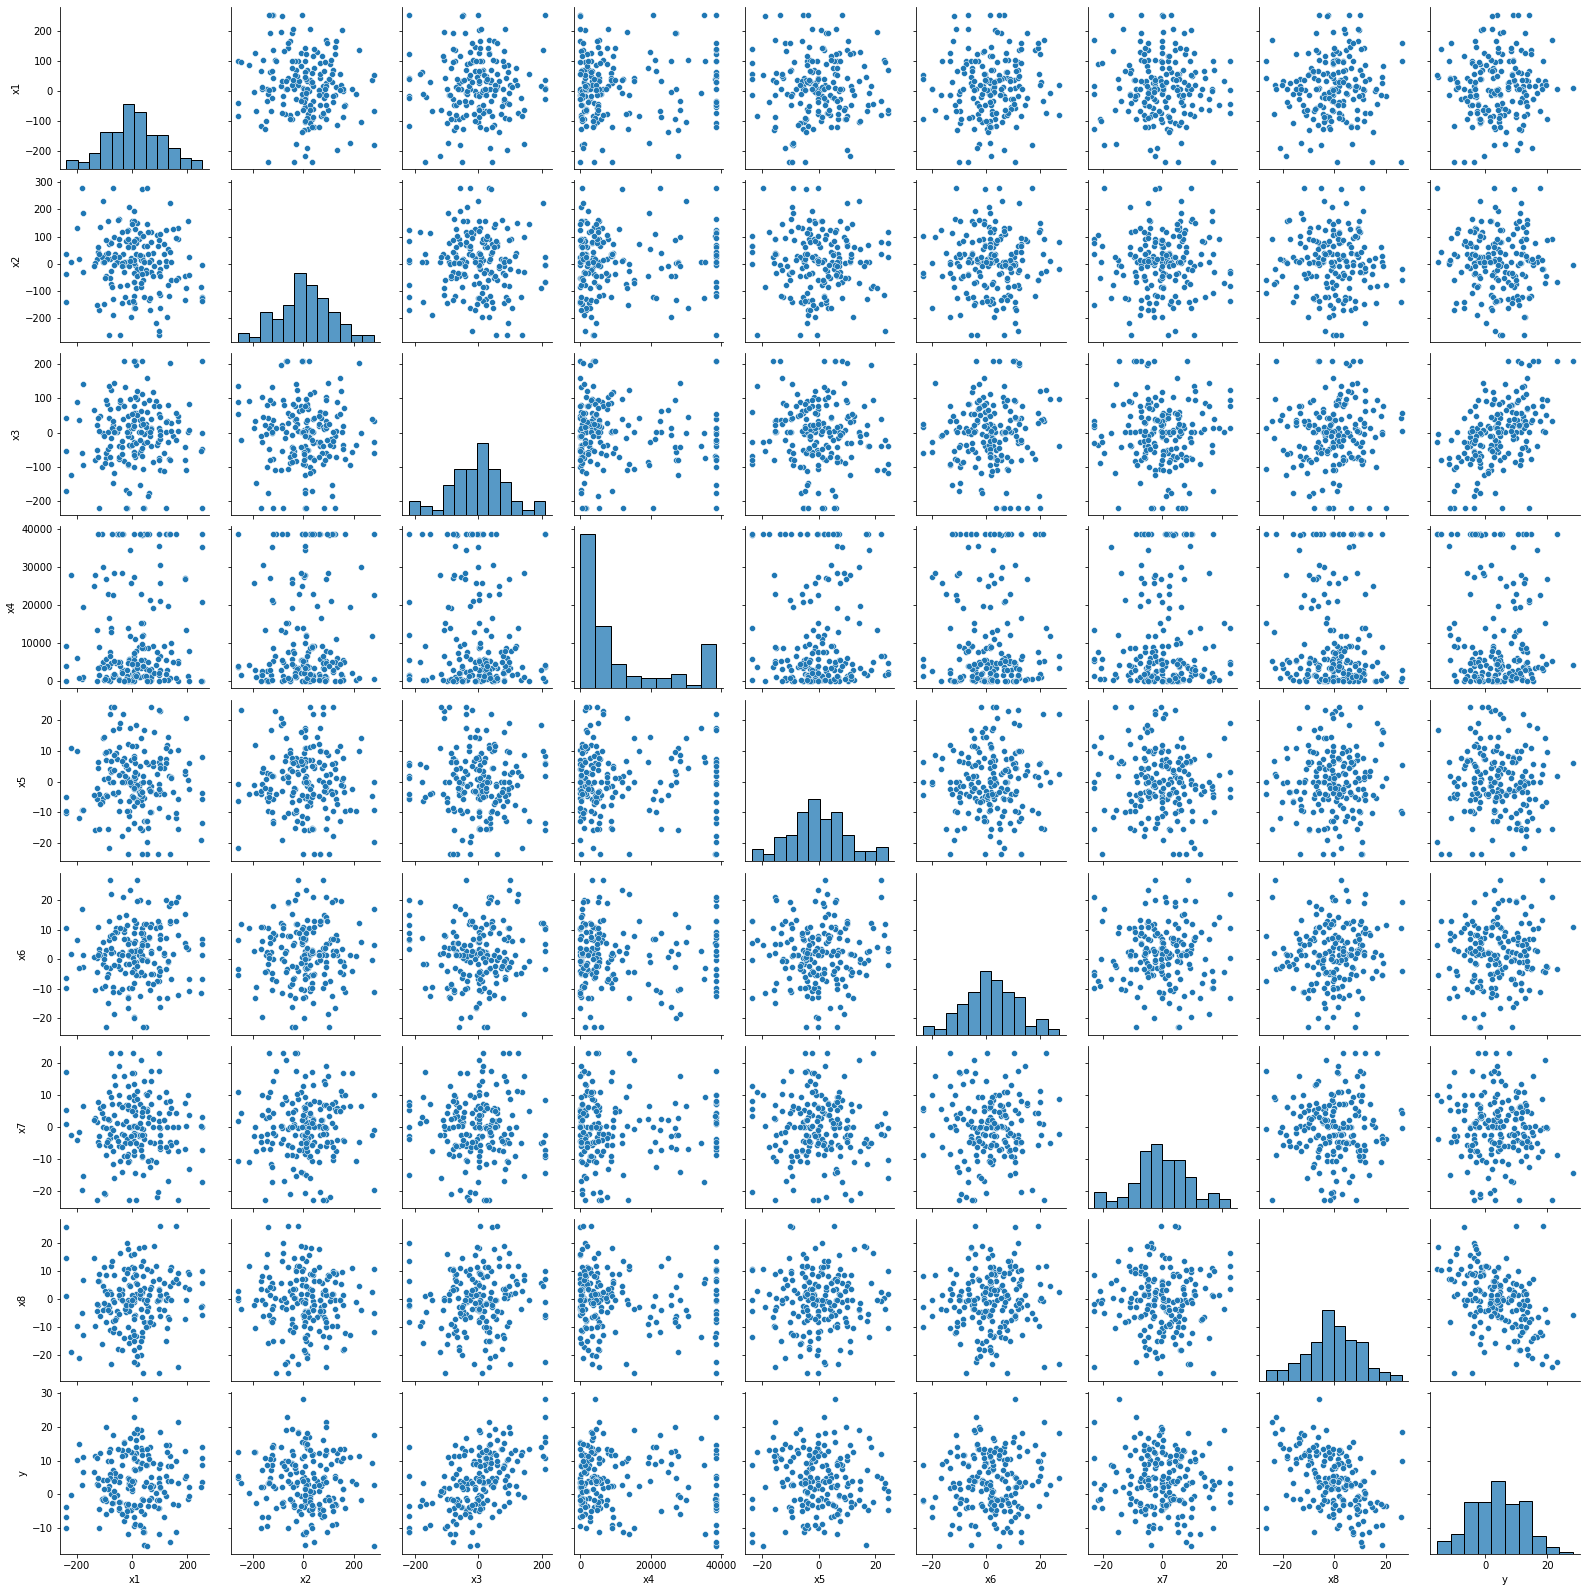

In [309]:
sns.pairplot(train_set)

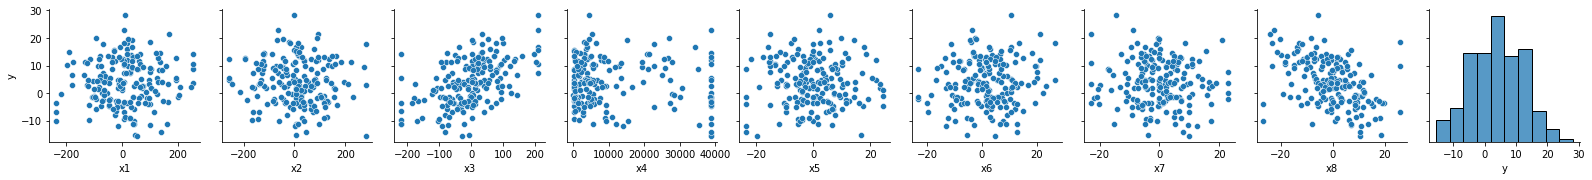

In [310]:
sns.pairplot(train_set, x_vars=train_set.columns, y_vars=['y'])

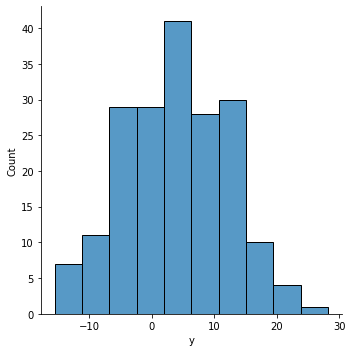

In [311]:
sns.displot(train_set['y'])

In [312]:
train_set.corr()

,x1,x2,x3,x4,x5,x6,x7,x8,y
x1,1.000000,-0.120979,0.022303,0.084070,-0.016118,0.068105,-0.024762,0.083607,0.047631
x2,-0.120979,1.000000,-0.047528,0.054028,-0.052900,0.017039,0.023866,-0.052525,-0.066227
x3,0.022303,-0.047528,1.000000,-0.128606,-0.037837,0.062007,-0.017448,0.066743,0.512748
x4,0.084070,0.054028,-0.128606,1.000000,0.005444,-0.032027,0.059723,-0.091830,-0.103366
x5,-0.016118,-0.052900,-0.037837,0.005444,1.000000,0.044231,-0.069810,0.032434,-0.022824
x6,0.068105,0.017039,0.062007,-0.032027,0.044231,1.000000,0.004559,0.058027,0.080860
x7,-0.024762,0.023866,-0.017448,0.059723,-0.069810,0.004559,1.000000,0.018211,-0.066521
x8,0.083607,-0.052525,0.066743,-0.091830,0.032434,0.058027,0.018211,1.000000,-0.452851
y,0.047631,-0.066227,0.512748,-0.103366,-0.022824,0.080860,-0.066521,-0.452851,1.000000


<AxesSubplot:>

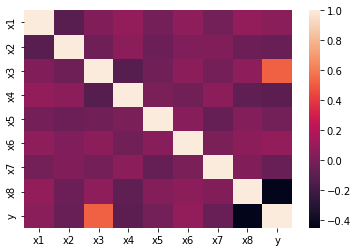

In [313]:
sns.heatmap(train_set.corr())

In [314]:
train_set.corr().sort_values('y')[['y']]

,y
x8,-0.452851
x4,-0.103366
x7,-0.066521
x2,-0.066227
x5,-0.022824
x1,0.047631
x6,0.080860
x3,0.512748
y,1.000000


### Select Feature and split X and y

In [315]:
X_train = train_set.loc[ :, ['x3','x8']]
y_train = train_set.loc[:, 'y']

In [316]:
X_train

,x3,x8
0,-60.460000,-17.13
1,23.300000,-7.70
2,-75.270000,8.65
3,2.463778,1.92
4,-2.890000,4.69
...,...,...
185,-44.410000,-11.73
186,53.260000,-0.42
187,-20.960000,3.23
188,-118.740000,-10.44


In [317]:
y_train

0       7.44
1       7.31
2      -5.77
3      -0.42
4       4.31
       ...  
185    11.78
186     3.79
187    -3.17
188     0.97
189     1.44
Name: y, Length: 190, dtype: float64

In [318]:
# train_set.to_csv('A-train-cleaned.csv')

### Linear regression modeling

In [319]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [320]:
regressor.coef_

array([ 0.04978316, -0.39302917])

In [321]:
regressor.intercept_

3.83722219410235

In [322]:
print("Linear regression MODEL")
print("")
print(y_train.name, "=")
for i in range(len(X_train.columns)):
  print("", regressor.coef_[i],"*",X_train.columns[i],"   +")
print("", regressor.intercept_)

Linear regression MODEL

y =
 0.04978316048237284 * x3    +
 -0.39302917346701943 * x8    +
 3.83722219410235


### Predict value

In [323]:
test_set

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,65.16,4.49,-105.75,600.25,-0.91,NaN,-1.36,-7.43,A_01
1,-24.74,-1.55,91.05,2401.98,-1.52,13.60,5.66,10.59,A_02
2,107.54,-28.69,-82.59,25789.15,5.29,-8.56,1.49,-4.73,A_03
3,12.02,32.32,NaN,2.76,1.20,-9.52,-4.20,7.48,A_04
4,45.08,96.62,51.85,1.28,3.58,0.52,-6.86,-0.78,A_05
5,-122.81,17.79,-182.85,2928.97,-1.21,-2.06,9.68,-8.59,A_06
6,77.61,-72.30,97.28,19173.94,-9.29,0.86,7.06,-8.06,A_07
7,-79.36,NaN,-220.91,NaN,7.24,6.19,NaN,9.71,A_08
8,NaN,188.39,-16.47,3976.56,NaN,-1.04,-23.44,NaN,A_09
9,-44.01,131.65,69.88,1778.31,-13.75,-14.75,-12.27,-0.83,A_10


In [324]:
X_test = test_set.iloc[:,:-1].values

In [325]:
X_test

array([[ 6.516000e+01,  4.490000e+00, -1.057500e+02,  6.002500e+02,
        -9.100000e-01,           nan, -1.360000e+00, -7.430000e+00],
       [-2.474000e+01, -1.550000e+00,  9.105000e+01,  2.401980e+03,
        -1.520000e+00,  1.360000e+01,  5.660000e+00,  1.059000e+01],
       [ 1.075400e+02, -2.869000e+01, -8.259000e+01,  2.578915e+04,
         5.290000e+00, -8.560000e+00,  1.490000e+00, -4.730000e+00],
       [ 1.202000e+01,  3.232000e+01,           nan,  2.760000e+00,
         1.200000e+00, -9.520000e+00, -4.200000e+00,  7.480000e+00],
       [ 4.508000e+01,  9.662000e+01,  5.185000e+01,  1.280000e+00,
         3.580000e+00,  5.200000e-01, -6.860000e+00, -7.800000e-01],
       [-1.228100e+02,  1.779000e+01, -1.828500e+02,  2.928970e+03,
        -1.210000e+00, -2.060000e+00,  9.680000e+00, -8.590000e+00],
       [ 7.761000e+01, -7.230000e+01,  9.728000e+01,  1.917394e+04,
        -9.290000e+00,  8.600000e-01,  7.060000e+00, -8.060000e+00],
       [-7.936000e+01,           nan, -2.

In [326]:
test_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
test_imputer.fit(X_test[:,:])
X_test[:,:] = test_imputer.transform(X_test[:,:])

In [327]:
X_test = pd.DataFrame(X_test, columns=['x1','x2','x3','x4','x5','x6','x7','x8'])

In [328]:
X_test

,x1,x2,x3,x4,x5,x6,x7,x8
0,65.160000,4.490000,-105.750000,600.25,-0.910000,-1.64,-1.360000,-7.430000
1,-24.740000,-1.550000,91.050000,2401.98,-1.520000,13.60,5.660000,10.590000
2,107.540000,-28.690000,-82.590000,25789.15,5.290000,-8.56,1.490000,-4.730000
3,12.020000,32.320000,-33.167778,2.76,1.200000,-9.52,-4.200000,7.480000
4,45.080000,96.620000,51.850000,1.28,3.580000,0.52,-6.860000,-0.780000
5,-122.810000,17.790000,-182.850000,2928.97,-1.210000,-2.06,9.680000,-8.590000
6,77.610000,-72.300000,97.280000,19173.94,-9.290000,0.86,7.060000,-8.060000
7,-79.360000,40.968889,-220.910000,6294.80,7.240000,6.19,-2.693333,9.710000
8,4.054444,188.390000,-16.470000,3976.56,-1.041111,-1.04,-23.440000,-0.293333
9,-44.010000,131.650000,69.880000,1778.31,-13.750000,-14.75,-12.270000,-0.830000


In [330]:
X_test = X_test.loc[:, ['x3','x8']]

In [331]:
X_test

,x3,x8
0,-105.750000,-7.430000
1,91.050000,10.590000
2,-82.590000,-4.730000
3,-33.167778,7.480000
4,51.850000,-0.780000
5,-182.850000,-8.590000
6,97.280000,-8.060000
7,-220.910000,9.710000
8,-16.470000,-0.293333
9,69.880000,-0.830000


In [332]:
y_pred = regressor.predict(X_test)

In [333]:
y_pred

array([  1.49285973,   4.20780001,   1.58465896,  -0.75383283,
         6.72504182,  -1.8895081 ,  11.84794318, -10.97668906,
         3.1325821 ,   7.64228366])